### Step 1: Load the data points and ground truth values

In [1]:
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd

# Define url and OS path that I want to save csv data under
DATA_URL = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/S1.txt"
DATA_URL_2 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s1-cb.txt"
DATA_URL_3 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s1-label.txt"

DATA_URL_4 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/S2.txt"
DATA_URL_5 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s2-cb.txt"
DATA_URL_6 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s2-label.txt"

DATA_URL_7 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/S3.txt"
DATA_URL_8 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s3-cb.txt"
DATA_URL_9 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s3-label.txt"

DATA_URL_10 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/S4.txt"
DATA_URL_11 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s4-cb.txt"
DATA_URL_12 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/s4-label.txt"

DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file, header=None)

# Creating 2 separate dataframes
s1_df = fetch_and_load_from_url(DATA_URL, DATA_PATH, "s1_data.txt")
s1_true_df = fetch_and_load_from_url(DATA_URL_2, DATA_PATH, "s1_true_data.txt")
s1_label_df = fetch_and_load_from_url(DATA_URL_3, DATA_PATH, "s1_label.txt")

s2_df = fetch_and_load_from_url(DATA_URL_4, DATA_PATH, "s2_data.txt")
s2_true_df = fetch_and_load_from_url(DATA_URL_5, DATA_PATH, "s2_true_data.txt")
s2_label_df = fetch_and_load_from_url(DATA_URL_6, DATA_PATH, "s2_label.txt")

s3_df = fetch_and_load_from_url(DATA_URL_7, DATA_PATH, "s3_data.txt")
s3_true_df = fetch_and_load_from_url(DATA_URL_8, DATA_PATH, "s3_true_data.txt")
s3_label_df = fetch_and_load_from_url(DATA_URL_9, DATA_PATH, "s3_label.txt")

s4_df = fetch_and_load_from_url(DATA_URL_10, DATA_PATH, "s4_data.txt")
s4_true_df = fetch_and_load_from_url(DATA_URL_11, DATA_PATH, "s4_true_data.txt")
s4_label_df = fetch_and_load_from_url(DATA_URL_12, DATA_PATH, "s4_label.txt")


s4_df

,0
0,624474 837604
1,673412 735362
2,647442 677000
3,532283 741384
4,646529 742844
...,...
4995,540118 671072
4996,507453 777031
4997,569266 738385
4998,444587 878830


#### Need to split data into X and Y columns and drop original

In [2]:
# Separating the two values in each single column and expanding to two separate columns
s1_df[['X','Y']] = s1_df[0].str.split(expand=True)
s2_df[['X','Y']] = s2_df[0].str.split(expand=True)
s3_df[['X','Y']] = s3_df[0].str.split(expand=True)
s4_df[['X','Y']] = s4_df[0].str.split(expand=True)
# Dropping the original column from the df since both values are extracted to separate columns
s1_df.drop(columns={0}, inplace=True)
s2_df.drop(columns={0}, inplace=True)
s3_df.drop(columns={0}, inplace=True)
s4_df.drop(columns={0}, inplace=True)
# Doing the same separation for true cluster values
s1_true_df[['X','Y']] = s1_true_df[0].str.split(expand=True)
s2_true_df[['X','Y']] = s2_true_df[0].str.split(expand=True)
s3_true_df[['X','Y']] = s3_true_df[0].str.split(expand=True)
s4_true_df[['X','Y']] = s4_true_df[0].str.split(expand=True)

s1_true_df.drop(columns={0}, inplace=True)
s2_true_df.drop(columns={0}, inplace=True)
s3_true_df.drop(columns={0}, inplace=True)
s4_true_df.drop(columns={0}, inplace=True)

s3_df

,X,Y
0,453320,606542
1,520651,594591
2,516664,660290
3,570023,570741
4,524035,518443
...,...,...
4995,361134,191237
4996,393818,302840
4997,351482,334662
4998,341057,341338


### Step 2: Plot points according to ground truth classes.
- According to file, there are 15 ground truth classes

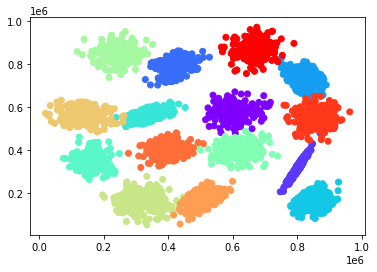

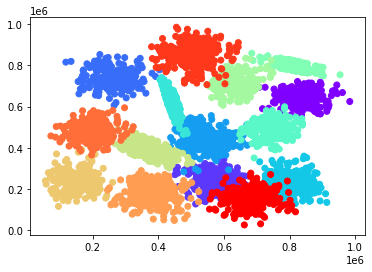

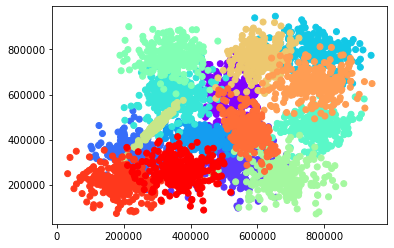

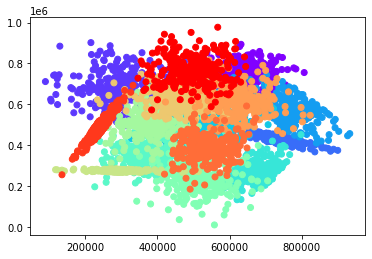

In [98]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
# Have to convert the dataframe to numpy array and change type to int from string
data_s1 = s1_df.to_numpy().astype(int)
data_s2 = s2_df.to_numpy().astype(int)
data_s3 = s3_df.to_numpy().astype(int)
data_s4 = s4_df.to_numpy().astype(int)

# Creating KMeans classifier with 15 clusters specified due to ground truth class. Fitting and predicting class labels
# In retrospect, I realized that I didn't need to do a KMeans classification to get the labels because they were already given.
# Decided to keep code here for fear of breaking things.
y_pred = KMeans(n_clusters=15).fit_predict(data_s1)
y_pred_2 = KMeans(n_clusters=15).fit_predict(data_s2)
y_pred_3 = KMeans(n_clusters=15).fit_predict(data_s3)
y_pred_4 = KMeans(n_clusters=15).fit_predict(data_s4)

# Plotting data values and their corresponding label value/color
# variable c will act as key for what color each instance should be labeled as - this will give us our colored clusters
plt.scatter(data_s1[:,0], data_s1[:,1],c=s1_label_df, cmap='rainbow')
plt.show()
plt.scatter(data_s2[:,0], data_s2[:,1],c=s2_label_df, cmap='rainbow')
plt.show()
plt.scatter(data_s3[:,0], data_s3[:,1],c=s3_label_df, cmap='rainbow')
plt.show()
plt.scatter(data_s4[:,0], data_s4[:,1],c=s4_label_df, cmap='rainbow')
plt.show()

### Step 3: Split data into train and test

In [4]:
from sklearn.model_selection import train_test_split
# Making sure that label data is formatted correctly as a numpy array of arrays and casted to an int if still an object
s1_label = s1_label_df.to_numpy().astype(int)
s2_label = s2_label_df.to_numpy().astype(int)
s3_label = s3_label_df.to_numpy().astype(int)
s4_label = s4_label_df.to_numpy().astype(int)
# Splitting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(data_s1, s1_label, test_size=.30)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_s2, s2_label, test_size=.30)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_s3, s3_label, test_size=.30)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data_s4, s4_label, test_size=.30)

### Step 4: Use KNN to cluster the data
- First is with Sklearn library

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Making KNN classifiers with neighbors to consider set to 3 - good number to set them too - adjusted later for better results
clf = KNeighborsClassifier(n_neighbors=3)
clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_3 = KNeighborsClassifier(n_neighbors=9)
clf_4 = KNeighborsClassifier(n_neighbors=11)
# Fitting the training data to the models
clf.fit(X_train, y_train.ravel())
clf_2.fit(X_train_2, y_train_2.ravel())
clf_3.fit(X_train_3, y_train_3.ravel())
clf_4.fit(X_train_4, y_train_4.ravel())
# Running predictions
y_pred = clf.predict(X_test)
y_pred_2 = clf.predict(X_test_2)
y_pred_3 = clf.predict(X_test_3)
y_pred_4 = clf.predict(X_test_4)
# Printing out accuracy of models
print("Accuracy for S1: ",accuracy_score(y_test, y_pred))
print("Accuracy for S2: ",accuracy_score(y_test_2, y_pred_2))
print("Accuracy for S3: ",accuracy_score(y_test_3, y_pred_3))
print("Accuracy for S4: ",accuracy_score(y_test_4, y_pred_4))

Accuracy for S1:  0.994
Accuracy for S2:  0.102
Accuracy for S3:  0.09266666666666666
Accuracy for S4:  0.09533333333333334


- Second is with own Numpy implementation

In [6]:
"""
def knn(X_train, y_train, X_test, neighbors=3):
    # Need to get training data into a single matrix for distance comparisions to incoming data
    comparison_matrix = np.concatenate((X_train, y_train), axis=1)
    # Will be holding our predicted class for test data
    y_predict = np.zeros(shape=X_test.shape[0])
    distance = np.array([])
    
    
    
    for item in range(X_test.shape[0]):
        for inner in range(X_train.shape[0]):
            distanceX = np.square( np.int64(np.subtract(comparison_matrix[inner][0], X_test[item][0])) )
            distanceY = np.square( np.int64(np.subtract(comparison_matrix[inner][1], X_test[item][1])) )
            total_distance = distanceX + distanceY
            total_distance = np.sqrt(total_distance)
            distance_label = np.array([total_distance, comparison_matrix[inner][2]])
            distance = np.append(distance, distance_label)
    return distance


def euclidean_distance(vector1, vector2):
    subtract = np.int64(np.subtract(vector1, vector2))
    return np.sqrt(np.sum(np.power(subtract, 2)))

    
"""
import statistics
def myFunc(e):
    return e[0] # Simple function so that sorting function knows how to access element within object that is passed


def euclidean_distance(vector1, vector2):
    # Subtracting the two vectors from each other and upcasting to int64 to prevent overflow in future
    subtract = np.int64(np.subtract(vector1, vector2))
    # Raising the values of the subtracted vectors to the power 2 and then summing across all vectors - then taking square root
    return np.sqrt(np.sum(np.power(subtract, 2)))

def get_neighbours(X_train, X_test_instance, y_train, k):
    distances = []
    neighbors = []
    for i in range(0, X_train.shape[0]): # For each item in the X data
        # Get the distances of that item from all other items that are currently in the dataset
        # Since there are no values initially, the testing X data is first used to make determinations of the distances
        dist = euclidean_distance(X_train[i], X_test_instance)
        # Getting the distances and attaching the label that corresponds to that distance
        final = [dist, y_train[i][0]]
        # Attaching distance to final distances array for this particular instance
        distances.append(final)
    # Sorting the distances based on smallest distance first using defined function above to help access the object itself
    distances.sort(key=myFunc)
    
    for x in range(k): # For the amount of neighbors to consider
        # Attaching the top K neighbors to final output to make determination of closest neighbors to instance and their labels
        neighbors.append(distances[x][1])
    return neighbors

def determine_label(neighbors):
    # Label is determined based on the mode of the labels around the instance in question
    return statistics.mode(neighbors)

def kNN_test(X_train, X_test, Y_train, Y_test, k):
    output_classes = []
    for i in range(0, X_test.shape[0]):
        # Going through all instances and getting a list of their closest neighbors
        output = get_neighbours(X_train, X_test[i], Y_train, k)
        # Determining the mode label and adding to list for final output
        output_classes.append(determine_label(output))
    return output_classes
# Credit: https://anujkatiyal.com/blog/2017/10/01/ml-knn/

In [7]:
int(X_test.shape[0])

1500

In [99]:
# Running KNN Numpy implementation - note that y_test doesn't actually do anything but just keeping in fear of breaking
output = kNN_test(X_train, X_test, y_train, y_test, k=3)
output_2 = kNN_test(X_train_2, X_test_2, y_train_2, y_test_2, k=3)
output_3 = kNN_test(X_train_3, X_test_3, y_train_3, y_test_3, k=3)
output_4 = kNN_test(X_train_4, X_test_4, y_train_4, y_test_4, k=3)


In [9]:
# Printing accuracies of the runs
print("Accuracy for S1: ",accuracy_score(y_test, output))
print("Accuracy for S2: ",accuracy_score(y_test_2, output_2))
print("Accuracy for S3: ",accuracy_score(y_test_3, output_3))
print("Accuracy for S4: ",accuracy_score(y_test_4, output_4))

Accuracy for S1:  0.9913333333333333
Accuracy for S2:  0.9646666666666667
Accuracy for S3:  0.8506666666666667
Accuracy for S4:  0.776


### Step 5: Plot results in different colors similar to Step 2.

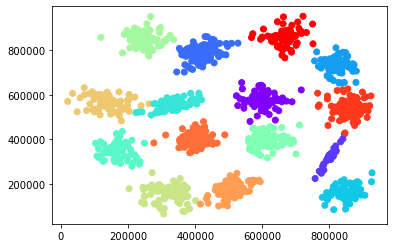

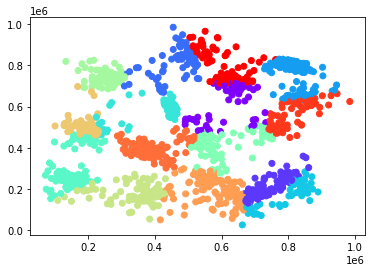

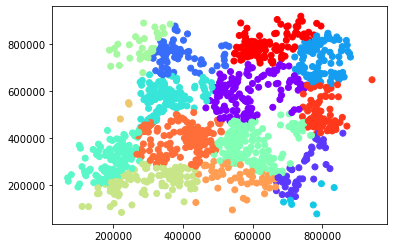

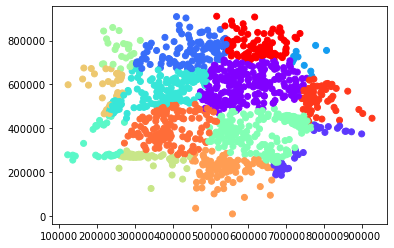

In [10]:
# Plotting data values and their corresponding label value/color
plt.scatter(X_test[:,0], X_test[:,1],c=y_pred, cmap='rainbow')
plt.show()
plt.scatter(X_test_2[:,0], X_test_2[:,1],c=y_pred_2, cmap='rainbow')
plt.show()
plt.scatter(X_test_3[:,0], X_test_3[:,1],c=y_pred_3, cmap='rainbow')
plt.show()
plt.scatter(X_test_4[:,0], X_test_4[:,1],c=y_pred_4, cmap='rainbow')
plt.show()

### Plot for Numpy KNN model

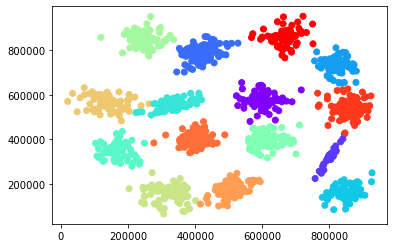

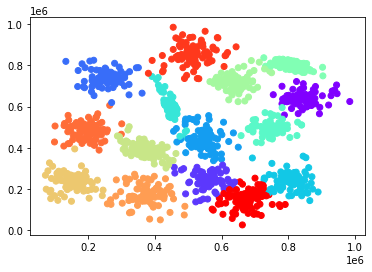

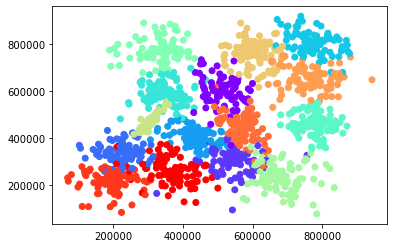

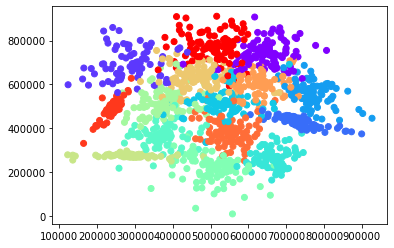

In [11]:
plt.scatter(X_test[:,0], X_test[:,1],c=output, cmap='rainbow')
plt.show()
plt.scatter(X_test_2[:,0], X_test_2[:,1],c=output_2, cmap='rainbow')
plt.show()
plt.scatter(X_test_3[:,0], X_test_3[:,1],c=output_3, cmap='rainbow')
plt.show()
plt.scatter(X_test_4[:,0], X_test_4[:,1],c=output_4, cmap='rainbow')
plt.show()

### Step 6: Print the confusion matrix to check model performance

In [12]:
from sklearn.metrics import confusion_matrix
# For Sklearn model
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test_2, y_pred_2))
print(confusion_matrix(y_test_3, y_pred_3))
print(confusion_matrix(y_test_4, y_pred_4))

[[ 87   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0   0   0   0   3   0]
 [  0   0 114   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  89   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0 108   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  96   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  90   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  90   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  97   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 114   0   2   0   0   0]
 [  0   0   0   0   0   3   0   0   0   0  88   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 101   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 109   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 113   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 113]]
[[  1   0   0  42   0   0   0   0   0   0   0   0   0 

In [13]:
# For my own model
print(confusion_matrix(y_test, output))
print("\n",confusion_matrix(y_test_2, output_2))
print('\n',confusion_matrix(y_test_3, output_3))
print('\n',confusion_matrix(y_test_4, output_4))

[[ 87   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0  78   0   0   0   0   0   0   0   0   0   0   0   3   0]
 [  0   0 114   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  89   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0 108   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  96   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0  90   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  90   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0  97   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 114   0   2   0   0   0]
 [  0   0   0   0   0   3   0   0   0   0  88   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 101   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 109   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 113   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 113]]

 [[ 80   0   0   0   0   0   1   0   1   0   0   0   

### Step 7: Repeat Steps 3 - 6 and use K-Means to perform the same. Also print the centroids

#### Repeat Step 3: Split into train and test

In [14]:
del X_train, X_test, y_train, y_test
del X_train_2, X_test_2, y_train_2, y_test_2
del X_train_3, X_test_3, y_train_3, y_test_3
del X_train_4, X_test_4, y_train_4, y_test_4

X_train, X_test, y_train, y_test = train_test_split(data_s1, s1_label, test_size=.30)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data_s2, s2_label, test_size=.30)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(data_s3, s3_label, test_size=.30)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(data_s4, s4_label, test_size=.30)

#### Repeat Step 4: Use K-Means to cluser the data
- First with Sklearn library

In [15]:
from sklearn.cluster import KMeans
# Using 15 clusters as indicated by labels
k_mean = KMeans(n_clusters=15)
k_mean_2 = KMeans(n_clusters=15)
k_mean_3 = KMeans(n_clusters=15)
k_mean_4 = KMeans(n_clusters=15)

k_mean.fit(X_train)
k_mean_2.fit(X_train_2)
k_mean_3.fit(X_train_3)
k_mean_4.fit(X_train_4)

predict_k = k_mean.predict(X_test)
predict_k_2 = k_mean.predict(X_test_2)
predict_k_3 = k_mean.predict(X_test_3)
predict_k_4 = k_mean.predict(X_test_4)

- Next with own Numpy implementation

In [100]:
def create_centroids(points, k):
    all_points = points.copy()
    # Shuffling points so that we don't pick the same centroid locations
    np.random.shuffle(all_points)
    # Picking K centroids from the list and returning
    centroids = all_points[:k]
    return centroids

def find_closest(points, centroids):
    # Casting the points to a float so that overflow doesn't occur in math below
    points = points.astype(float)
    # Define the distance to each point from a centroid as the sum of the squared differences
    distances = np.sqrt( ((points - centroids[:, np.newaxis])**2).sum(axis=2) )
    # Getting the indexes of the minimum distance vectors along the row axis
    min_distances = np.argmin(distances, axis=0)
    return min_distances

def adjust_centroids(points, closest_centroid, centroids):
    """for k in range(centroids.shape[0]):
        centroids[k] = points[closest_centroid==k].mean(axis=0)
    plt.scatter(centroids[:,0], centroids[:,1], c='black')
    plt.show()    
    return centroids"""
    # Run through the points and if their centroid is the one in question, then get its location
    # Use mean of points to find the next centroid location
    return np.array([points[closest_centroid==k].mean(axis=0) for k in range(centroids.shape[0])])

def run_training(iteration_count, data, centroid_num):
    # First run so that can pass parameters into for loop
    centroids = create_centroids(data, centroid_num)
    closest = find_closest(data, centroids)
    centroid_location = adjust_centroids(data, closest, centroids)
    
    for item in range(iteration_count-1): # For number of rounds, determine the closest centroid, and adjust centroids
        closest = find_closest(data, centroid_location)
        centroid_location = adjust_centroids(data, closest, centroid_location)
        
    return centroid_location

def classify_points(points, centroids):
    labels = find_closest(points, centroids)
    return labels

centroids = run_training(500, X_train, 15)
centroids_2 = run_training(500, X_train_2, 15)
centroids_3 = run_training(500, X_train_3, 15)
centroids_4 = run_training(500, X_train_4, 15)

labels = classify_points(X_test, centroids)
labels_2 = classify_points(X_test_2, centroids_2)
labels_3 = classify_points(X_test_3, centroids_3)
labels_4 = classify_points(X_test_4, centroids_4)


# Credit to: https://flothesof.github.io/k-means-numpy.html

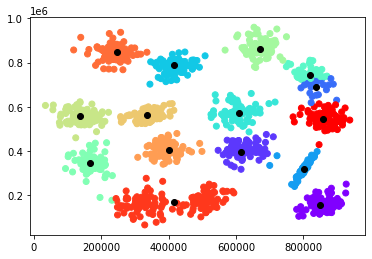

In [17]:
plt.scatter(X_test[:,0], X_test[:,1],c=labels, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c='black')
plt.show()

#### Repeat Step 5: Plot result in different colors (Cluster centroids in black)

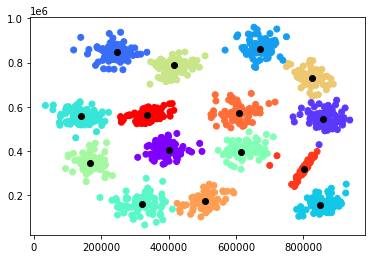

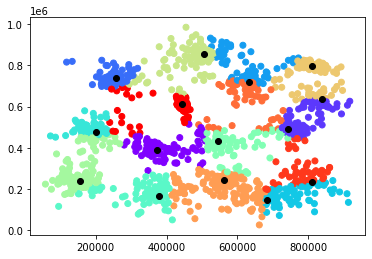

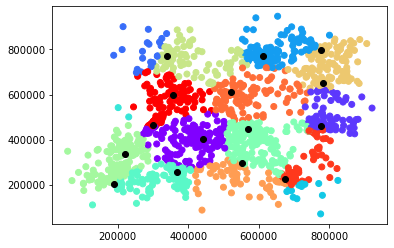

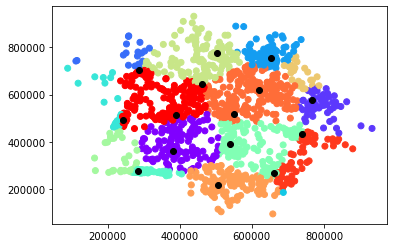

In [18]:
plt.scatter(X_test[:,0], X_test[:,1],c=predict_k, cmap='rainbow')
plt.scatter(k_mean.cluster_centers_[:,0], k_mean.cluster_centers_[:,1], c='black')
plt.show()

plt.scatter(X_test_2[:,0], X_test_2[:,1],c=predict_k_2, cmap='rainbow')
plt.scatter(k_mean_2.cluster_centers_[:,0], k_mean_2.cluster_centers_[:,1], c='black')
plt.show()

plt.scatter(X_test_3[:,0], X_test_3[:,1],c=predict_k_3, cmap='rainbow')
plt.scatter(k_mean_3.cluster_centers_[:,0], k_mean_3.cluster_centers_[:,1], c='black')
plt.show()

plt.scatter(X_test_4[:,0], X_test_4[:,1],c=predict_k_4, cmap='rainbow')
plt.scatter(k_mean_4.cluster_centers_[:,0], k_mean_4.cluster_centers_[:,1], c='black')
plt.show()

### Print for Numpy implementation

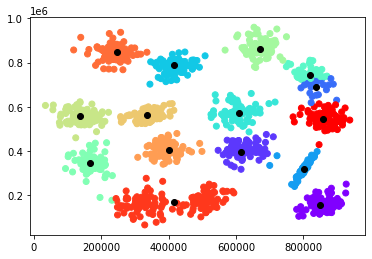

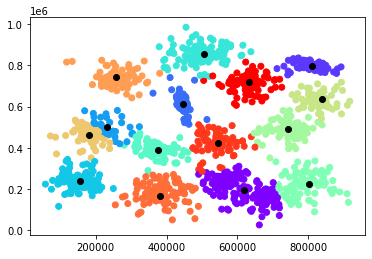

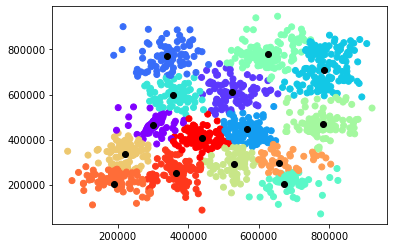

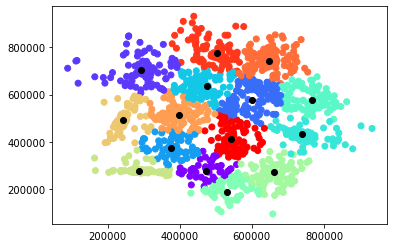

In [19]:
plt.scatter(X_test[:,0], X_test[:,1],c=labels, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c='black')
plt.show()

plt.scatter(X_test_2[:,0], X_test_2[:,1],c=labels_2, cmap='rainbow')
plt.scatter(centroids_2[:,0], centroids_2[:,1], c='black')
plt.show()

plt.scatter(X_test_3[:,0], X_test_3[:,1],c=labels_3, cmap='rainbow')
plt.scatter(centroids_3[:,0], centroids_3[:,1], c='black')
plt.show()

plt.scatter(X_test_4[:,0], X_test_4[:,1],c=labels_4, cmap='rainbow')
plt.scatter(centroids_4[:,0], centroids_4[:,1], c='black')
plt.show()


#### Repeat Step 6: Print the confusion matrix

In [20]:
print(confusion_matrix(y_test, predict_k))
print("\n",confusion_matrix(y_test_2, predict_k_2))
print("\n",confusion_matrix(y_test_3, predict_k_3))
print("\n",confusion_matrix(y_test_4, predict_k_4))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  92   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0  91   0   0]
 [  0   0   0   0   0   0   0   0   0  98   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  92   0   0   0   0   0]
 [  0   0   0   0 102   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  97   0]
 [  0   0   0   0   0   1   0   0 107   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  99   0   0   0   0   0   2   0   0]
 [  0   0 108   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  97   0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0  98   0   0   0   0   0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99   0   0   0   0]
 [103   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 106   0   0   0   0   0   0   0   0   0   0   0   0   0 

### Confusion Matrix for numpy K-means

In [21]:
print(confusion_matrix(y_test, labels))
print("\n",confusion_matrix(y_test_2, labels_2))
print("\n",confusion_matrix(y_test_3, labels_3))
print("\n",confusion_matrix(y_test_4, labels_4))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  92   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  91   0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0  98   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  25   0   0   0  67   0   0   0   0   0   0   0   0   0]
 [102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  97   0   0   0   0   0]
 [  0   0   0   0   0   0   0 107   0   1   0   0   0   0   0   0]
 [  0  98   0   2   0   1   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 108   0   0   0]
 [  0   0   0   0   0   0   0   2   0   0   0   0   0  97   0   0]
 [  0   0   0   0   0   0   0   0   0  98   3   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  99   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 103   0   0   0   0]
 [  0   0   2   0   0   0   0   0   0   0   0   0   0   0 104 

## Step 8) Compare the results between KNN and K-Means

Since there is no real sense of computing accuracy in K-Means because the centroid may or may not correspond to the actual label number, visuals will have to be my guiding criteria. For the most part, both algorithms did pretty well. I would say that KNN did better though. One thing I noticed was that if K-Means had two starting cluster points together in the beginning, then they would most likely be next to each other at the end of training. This could lead to the splitting of a single cluster into two clusters if properly placed, which was the case in my implementations of K-Means. Of course properly placed centroids would be a good way to address this issue.

### Steps for Dataset 2

In [24]:
DATA_URL_12 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/dim32.txt"
DATA_URL_13 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/dim32_ground_truth.txt"

# Creating 2 separate dataframes
dim32_df = fetch_and_load_from_url(DATA_URL_12, DATA_PATH, "dim32_data.txt")
dim32_label = fetch_and_load_from_url(DATA_URL_13, DATA_PATH, "dim32_label.txt")
dim32_label

,0
0,1
1,1
2,1
3,1
4,1
...,...
1019,16
1020,16
1021,16
1022,16


In [29]:
dim32_df[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19',
         '20','21','22','23','24','25','26','27','28','29','30','31','32']] = dim32_df[0].str.split(expand=True)
dim32_df.drop(columns={0}, inplace=True)
dim32_df

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,84,152,100,52,95,186,169,106,37,186,...,190,65,214,116,75,55,123,65,154,177
1,86,149,101,56,93,181,171,116,37,192,...,191,79,215,116,76,60,130,71,151,181
2,83,149,99,51,96,187,169,108,34,191,...,190,65,213,118,73,55,125,63,155,178
3,86,142,101,64,105,183,172,116,49,180,...,186,69,209,120,68,56,123,67,144,181
4,89,145,108,54,91,180,175,107,35,192,...,188,67,212,118,91,50,135,58,147,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,105,53,168,77,187,142,155,181,128,62,...,197,193,114,102,58,78,80,132,97,75
1020,104,53,169,77,187,142,155,182,128,63,...,196,192,113,102,58,78,80,132,97,75
1021,101,52,171,78,190,141,153,180,130,63,...,194,191,114,102,57,78,83,132,98,73
1022,106,59,165,74,186,143,151,180,125,66,...,195,193,115,102,55,76,81,131,98,73


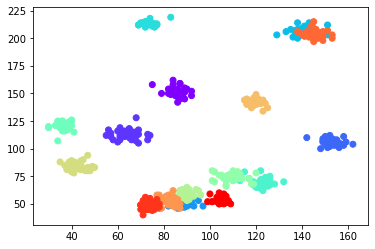

In [93]:
# Plot ground truth
data_set2 = dim32_df.to_numpy().astype(int)
# Noted 16 classes in ground truth file
y_pred_dim32 = KMeans(n_clusters=16).fit_predict(data_set2)

# Plotting data values and their corresponding label value/color
plt.scatter(data_set2[:,0], data_set2[:,1],c=dim32_label, cmap='rainbow')
plt.show()

In [31]:
# Split into train and test
dim32_label = dim32_label.to_numpy().astype(int)

X_train32, X_test32, y_train32, y_test32 = train_test_split(data_set2, dim32_label, test_size=.30)

In [32]:
# Use KNN to cluster
clf_dim32 = KNeighborsClassifier(n_neighbors=3)

clf_dim32.fit(X_train32, y_train32.ravel())

y_pred_dim32 = clf_dim32.predict(X_test32)

print("Accuracy for Dim 32: ",accuracy_score(y_test32, y_pred_dim32))

Accuracy for Dim 32:  1.0


In [35]:
# Now with own numpy code
output_dim32 = kNN_test(X_train32, X_test32, y_train32, y_test32, k=3)
print("Accuracy for Dim 32: ",accuracy_score(y_test32, output_dim32))

Accuracy for Dim 32:  1.0


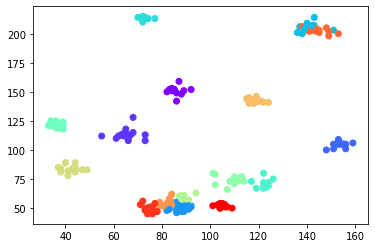

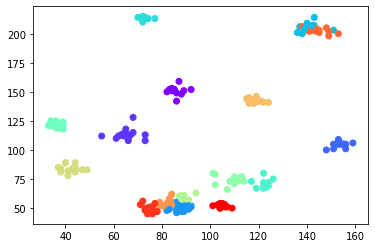

In [37]:
# Plot results
plt.scatter(X_test32[:,0], X_test32[:,1],c=y_pred_dim32, cmap='rainbow')
plt.show()
plt.scatter(X_test32[:,0], X_test32[:,1],c=output_dim32, cmap='rainbow')
plt.show()

In [39]:
# Print confusion matrix
print(confusion_matrix(y_test32, y_pred_dim32))
print("\n",confusion_matrix(y_test32, output_dim32))

[[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 21]]

 [[16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0

## Repeat! With K-Means

In [40]:
# Split data
del X_train32, X_test32, y_train32, y_test32

X_train32, X_test32, y_train32, y_test32 = train_test_split(data_set2, dim32_label, test_size=.30)

In [41]:
# Use K-Means sklearn to cluster

k_mean_dim32 = KMeans(n_clusters=16)

k_mean_dim32.fit(X_train32)

predict_k_32 = k_mean_dim32.predict(X_test32)

In [42]:
# Use own numpy to cluster
centroids_dim32 = run_training(500, X_train32, 16)

labels_dim32 = classify_points(X_test32, centroids_dim32)

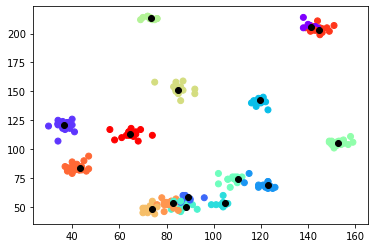

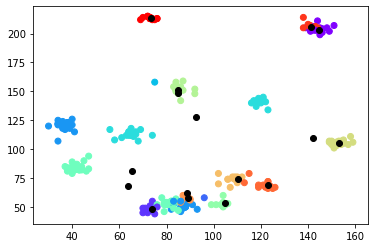

In [43]:
# Plot the results in different colors

plt.scatter(X_test32[:,0], X_test32[:,1],c=predict_k_32, cmap='rainbow')
plt.scatter(k_mean_dim32.cluster_centers_[:,0], k_mean_dim32.cluster_centers_[:,1], c='black')
plt.show()

plt.scatter(X_test32[:,0], X_test32[:,1],c=labels_dim32, cmap='rainbow')
plt.scatter(centroids_dim32[:,0], centroids_dim32[:,1], c='black')
plt.show()

### Compare results:
- KNN definitely outperformed the K-Means models here for both implementations. The Sklearn model for K-Means did do well however.
- Again, I can't really directly compare the two models but I would say the grouping was tight compared to KNN
- My numpy model for K-Means did not do well this go around. We can see that it also got caught up in some tight centroids that were initially placed.

## Steps for dataset 3:

In [44]:
DATA_URL_14 = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/spiral.txt"

# Creating 1 separate dataframes
spiral_df = fetch_and_load_from_url(DATA_URL_14, DATA_PATH, "spiral_data.txt")

In [45]:
spiral_df

,0
0,31.95\t7.95\t3
1,31.15\t7.3\t3
2,30.45\t6.65\t3
3,29.7\t6\t3
4,28.9\t5.55\t3
...,...
307,15.75\t13.85\t2
308,15.65\t14.05\t2
309,15.65\t14.25\t2
310,15.65\t14.5\t2


In [46]:
spiral_df[['1','2','3']] = spiral_df[0].str.split("\\t",expand=True)
spiral_df.drop(columns={0}, inplace=True)
spiral_df

,1,2,3
0,31.95,7.95,3
1,31.15,7.3,3
2,30.45,6.65,3
3,29.7,6,3
4,28.9,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.5,2


In [49]:
# Extract label and drop from original
spiral_label = spiral_df["3"]
spiral_df.drop(columns={"3"}, inplace=True)
spiral_df

,1,2
0,31.95,7.95
1,31.15,7.3
2,30.45,6.65
3,29.7,6
4,28.9,5.55
...,...,...
307,15.75,13.85
308,15.65,14.05
309,15.65,14.25
310,15.65,14.5


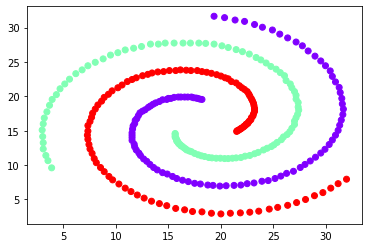

In [91]:
# Plot ground truth
data_spiral = spiral_df.to_numpy().astype(float)
# Noted 3 classes in label column
y_pred_spiral = KMeans(n_clusters=3).fit_predict(data_spiral)

# Plotting data values and their corresponding label value/color
plt.scatter(data_spiral[:,0], data_spiral[:,1],c=spiral_label, cmap='rainbow')
plt.show()

In [51]:
# Split into train and test
spiral_label = spiral_label.to_numpy().astype(int)

X_train_spiral, X_test_spiral, y_train_spiral, y_test_spiral = train_test_split(data_spiral, spiral_label, test_size=.30)

In [54]:
# Use KNN to cluster
clf_spiral = KNeighborsClassifier(n_neighbors=3)

clf_spiral.fit(X_train_spiral, y_train_spiral.ravel())

y_pred_spiral = clf_spiral.predict(X_test_spiral)

print("Accuracy for Spiral: ",accuracy_score(y_test_spiral, y_pred_spiral))

Accuracy for Spiral:  1.0


In [84]:
# Now with own numpy code
output_spiral = kNN_test(X_train_spiral, X_test_spiral, y_train_spiral.reshape(218,1), y_test_spiral, k=3)
print("Accuracy for Spiral: ",accuracy_score(y_test_spiral, output_spiral))

Accuracy for Spiral:  1.0


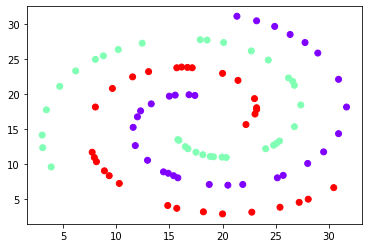

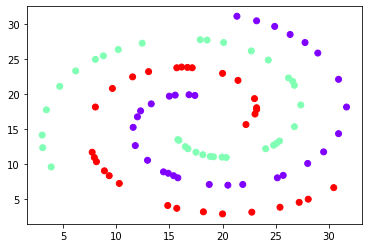

In [85]:
# Plot results
plt.scatter(X_test_spiral[:,0], X_test_spiral[:,1],c=y_pred_spiral, cmap='rainbow')
plt.show()
plt.scatter(X_test_spiral[:,0], X_test_spiral[:,1],c=output_spiral, cmap='rainbow')
plt.show()

In [86]:
# Print confusion matrix
print(confusion_matrix(y_test_spiral, y_pred_spiral))
print("\n",confusion_matrix(y_test_spiral, output_spiral))

[[30  0  0]
 [ 0 34  0]
 [ 0  0 30]]

 [[30  0  0]
 [ 0 34  0]
 [ 0  0 30]]


## Repeat! With K-Means

In [90]:
# Split into train and test
del X_train_spiral, X_test_spiral, y_train_spiral, y_test_spiral

X_train_spiral, X_test_spiral, y_train_spiral, y_test_spiral = train_test_split(data_spiral, spiral_label, test_size=.30)

In [92]:
# Use K-Means sklearn to cluster

k_mean_spiral = KMeans(n_clusters=3)

k_mean_spiral.fit(X_train_spiral)

predict_k_spiral = k_mean_spiral.predict(X_test_spiral)

In [94]:
# Use own numpy to cluster
centroids_spiral = run_training(500, X_train_spiral, 3)

labels_spiral = classify_points(X_test_spiral, centroids_spiral)

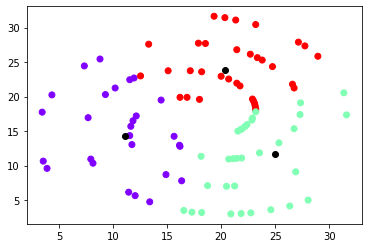

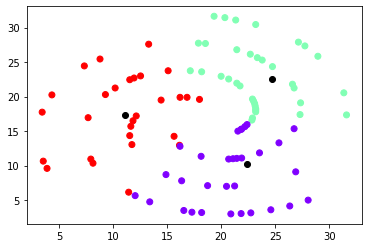

In [95]:
# Plot the results in different colors

plt.scatter(X_test_spiral[:,0], X_test_spiral[:,1],c=predict_k_spiral, cmap='rainbow')
plt.scatter(k_mean_spiral.cluster_centers_[:,0], k_mean_spiral.cluster_centers_[:,1], c='black')
plt.show()

plt.scatter(X_test_spiral[:,0], X_test_spiral[:,1],c=labels_spiral, cmap='rainbow')
plt.scatter(centroids_spiral[:,0], centroids_spiral[:,1], c='black')
plt.show()

### Compare results:
- Again, I would say KNN outperformed K-Means. Although K-Means was able to come up with some good results that would look otherwise correct, it was not able to capture the spiral pattern.
- This is a known issue of K-Means, it is not suited for shapes such as these.
- The KNN models both performed flawlessly and really it is easy to see why: Their neighbors have good distancing from all else. This kind of separation allows for easy classification based on proximity to an instance's neighbor.